# Predicting Breast Cancer 
## Part 4 : Neural Network Classification
### 1. Load Modules

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import time
import sys, os
import pandas as pd
import helper_functions as hf
from helper_functions import training_set_scaled, class_set_scaled
from helper_functions import test_set_scaled, test_class_set_scaled
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc 
from sklearn.externals import joblib

pd.set_option('display.max_columns', 500) 
# Included to show all the columns 
# since it is a fairly large data set

plt.style.use('ggplot') # Using ggplot2 style visuals 

### 2. Loading Data

In [2]:
breast_cancer = hf.breast_cancer

In [3]:
# dimensions of our data frame
breast_cancer.shape

(569, 31)

In [4]:
# data types of our columns 
breast_cancer.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

### 3. Fitting model

In [2]:
fit_nn = MLPClassifier(solver='lbfgs', 
                       hidden_layer_sizes = (12, ),
                       activation='tanh',
                       learning_rate_init=0.05, 
                       random_state=42)

# Train model on training set
fit_nn.fit(training_set_scaled, class_set_scaled['diagnosis'])

predictions_nn = fit_nn.predict(test_set_scaled)

accuracy_nn = fit_nn.score(test_set_scaled, 
                           test_class_set_scaled['diagnosis'])

In [3]:
# Here we calculate the test error rate!
test_error_rate_nn = 1 - accuracy_nn

# ROC Curve stuff
fpr3, tpr3, _ = roc_curve(predictions_nn, test_class_set_scaled)

auc_nn = auc(fpr3, tpr3)


    ##################################
    ##         FITTING MLP          ##
    ##################################
    
MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(12,), learning_rate='constant',
       learning_rate_init=0.05, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

    ############################################
    ##       HYPERPARAMETER OPTIMIZATION      ##
    ############################################
    
{'activation': 'tanh', 'hidden_layer_sizes': 12, 'learning_rate_init': 0.05}
27.549711227416992

    ################################
    ##      CROSS VALIDATION      ##
    ################################
    
Accuracy:  0.967 (+/-  0.011)

    ###############################
    ##   TEST

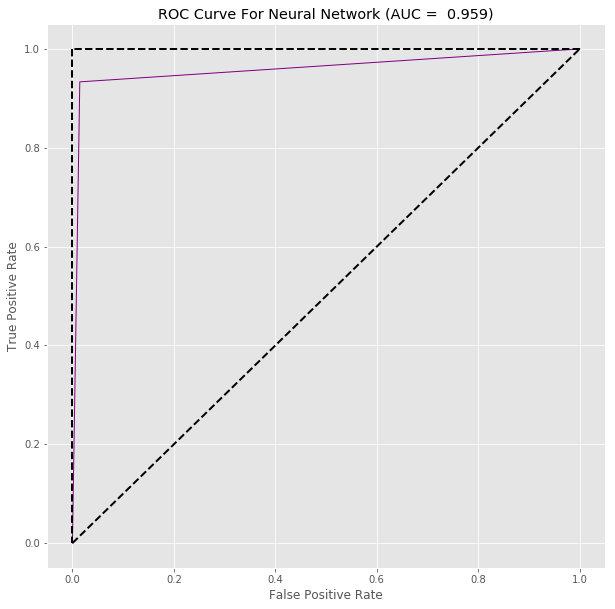

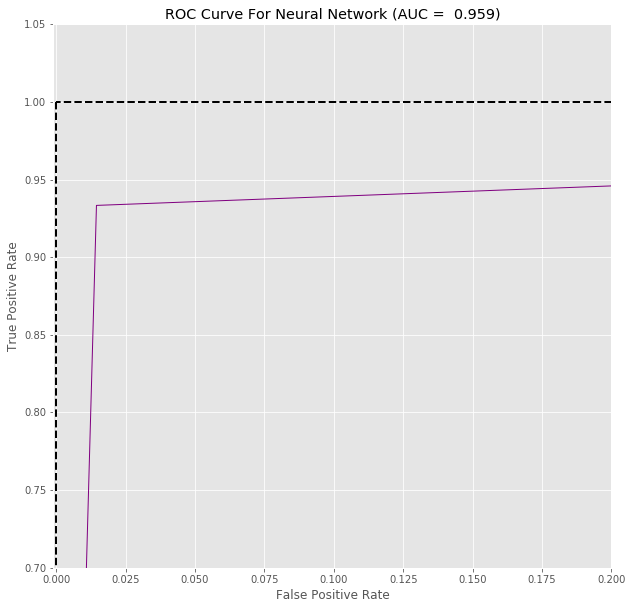

In [4]:
if __name__ == '__main__':
    print('''
    ##################################
    ##         FITTING MLP          ##
    ##################################
    ''')
    print(fit_nn)
    print('''
    ############################################
    ##       HYPERPARAMETER OPTIMIZATION      ##
    ############################################
    ''')
    
    start = time.time()
    gs = GridSearchCV(fit_nn, cv = 10,
                      param_grid={
                          'learning_rate_init': [0.05, 0.01, 0.005, 0.001],
                          'hidden_layer_sizes': [4, 8, 12],
                          'activation': ["relu", "identity", "tanh", "logistic"]})
    gs.fit(training_set_scaled, class_set_scaled['diagnosis'])
    print(gs.best_params_)
    end = time.time()
    print(end - start)
    print('''
    ################################
    ##      CROSS VALIDATION      ##
    ################################
    ''')
    
    test_thing = hf.cross_val_metrics(fit_nn, training_set_scaled, 
                                      class_set_scaled['diagnosis'], 
                                      print_results = True)
    
    print('''
    ###############################
    ##   TEST SET CALCULATIONS   ##
    ###############################
    ''')
    print(pd.crosstab(predictions_nn, 
                      test_class_set_scaled['diagnosis'], 
                      rownames=['Predicted Values'], 
                      colnames=['Actual Values']))

    print("Here is our mean accuracy on the test set:\n {0: .3f}"
          .format(accuracy_nn))

    print("The test error rate for our model is:\n {0: .3f}"
          .format(test_error_rate_nn))
    
    # ROC Curve
    hf.plot_roc_curve(fpr3, tpr3, auc_nn, 'nn')
    
    # Zoomed in ROC Curve
    hf.plot_roc_curve(fpr3, tpr3, auc_nn, 'nn',  
                      (-0.001, 0.2), (0.7, 1.05))
else:
    def return_nn():
        '''
        Function to output values created in script 
        '''
        return fpr3, tpr3, auc_nn, predictions_nn, test_error_rate_nn

    # Keep Cross validation metrics 
    mean_cv_nn, std_error_nn = hf.cross_val_metrics(fit_nn, 
                                                    training_set_scaled, 
                                                    class_set_scaled['diagnosis'], 
                                                    print_results = False)